<a href="https://colab.research.google.com/github/basangoudapatil/British_airways_sentimentanalysis/blob/main/BritishAirways_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/BA_reviews.csv')
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Worst experience ever. Outbound...
1,1,✅ Trip Verified | Check in was a shambles at ...
2,2,✅ Trip Verified | Beyond disgusted with the fa...
3,3,✅ Trip Verified | On July 19th 2022 I had subm...
4,4,✅ Trip Verified | I booked the flight on Oct ...


In [ ]:
df = df.drop(['Unnamed: 0'], axis =1)
df.head()

,reviews
0,Not Verified | Worst experience ever. Outbound...
1,✅ Trip Verified | Check in was a shambles at ...
2,✅ Trip Verified | Beyond disgusted with the fa...
3,✅ Trip Verified | On July 19th 2022 I had subm...
4,✅ Trip Verified | I booked the flight on Oct ...


# **Text Preprocessing**

**Remove Punctuations**

**Making Text Lower **

In [ ]:
# Replacing punctuations with space
df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [ ]:
df.head()

,reviews,review_processed
0,Not Verified | Worst experience ever. Outbound...,not verified worst experience ever outbound...
1,✅ Trip Verified | Check in was a shambles at ...,trip verified check in was a shambles at ...
2,✅ Trip Verified | Beyond disgusted with the fa...,trip verified beyond disgusted with the fa...
3,✅ Trip Verified | On July 19th 2022 I had subm...,trip verified on july 19th 2022 i had subm...
4,✅ Trip Verified | I booked the flight on Oct ...,trip verified i booked the flight on oct ...


In [ ]:
df = df.dropna()

Using Vader for Sentiment Analysis

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['scores'] = df['reviews'].apply(lambda review: sid.polarity_scores(review))

In [ ]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
df['sentiment'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,reviews,review_processed,scores,compound,sentiment
0,Not Verified | Worst experience ever. Outbound...,not verified worst experience ever outbound...,"{'neg': 0.197, 'neu': 0.696, 'pos': 0.108, 'co...",-0.5253,neg
1,✅ Trip Verified | Check in was a shambles at ...,trip verified check in was a shambles at ...,"{'neg': 0.09, 'neu': 0.86, 'pos': 0.05, 'compo...",-0.6590,neg
2,✅ Trip Verified | Beyond disgusted with the fa...,trip verified beyond disgusted with the fa...,"{'neg': 0.062, 'neu': 0.854, 'pos': 0.084, 'co...",0.4215,pos
3,✅ Trip Verified | On July 19th 2022 I had subm...,trip verified on july 19th 2022 i had subm...,"{'neg': 0.069, 'neu': 0.896, 'pos': 0.035, 'co...",-0.4939,neg
4,✅ Trip Verified | I booked the flight on Oct ...,trip verified i booked the flight on oct ...,"{'neg': 0.082, 'neu': 0.818, 'pos': 0.1, 'comp...",0.3180,pos


In [ ]:
df.head()

,reviews,review_processed,scores,compound,sentiment
0,Not Verified | Worst experience ever. Outbound...,not verified worst experience ever outbound...,"{'neg': 0.197, 'neu': 0.696, 'pos': 0.108, 'co...",-0.5253,neg
1,✅ Trip Verified | Check in was a shambles at ...,trip verified check in was a shambles at ...,"{'neg': 0.09, 'neu': 0.86, 'pos': 0.05, 'compo...",-0.6590,neg
2,✅ Trip Verified | Beyond disgusted with the fa...,trip verified beyond disgusted with the fa...,"{'neg': 0.062, 'neu': 0.854, 'pos': 0.084, 'co...",0.4215,pos
3,✅ Trip Verified | On July 19th 2022 I had subm...,trip verified on july 19th 2022 i had subm...,"{'neg': 0.069, 'neu': 0.896, 'pos': 0.035, 'co...",-0.4939,neg
4,✅ Trip Verified | I booked the flight on Oct ...,trip verified i booked the flight on oct ...,"{'neg': 0.082, 'neu': 0.818, 'pos': 0.1, 'comp...",0.3180,pos


In [ ]:
df['sentiment'].value_counts()

pos    550
neg    450
Name: sentiment, dtype: int64

Sentiment Analysis 

Pre-Processing Data 

Replacing short words

In [ ]:
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
# Removing Stopwords Begin
# import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['flight','seat','trip','verify','service','good','crew','london','time','food','cabin','get','board','check','class','one','would','fly','hour','business','well','staff','british','airline','heathrow','airway','take','drink','make','economy']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


1) split sentence into words

2) get the detailed POS for each word 

3) get shallow POS from detailed POS 

4) do lemmatisation for each word 

5) join all the words to form sentence

Plotting Freqent Words

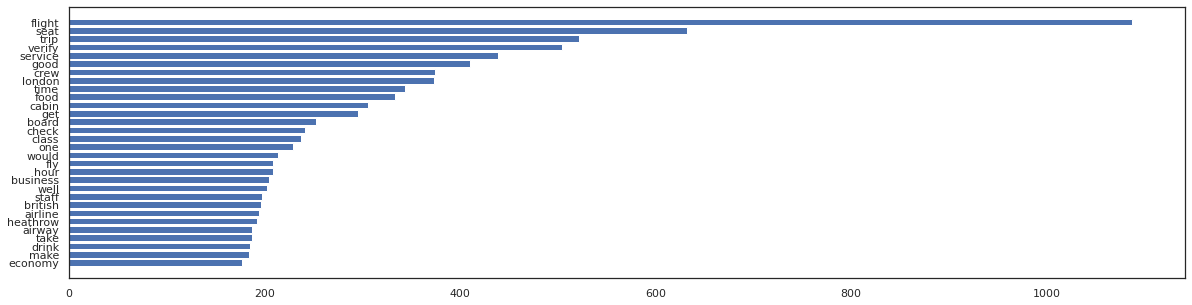

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'pos',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

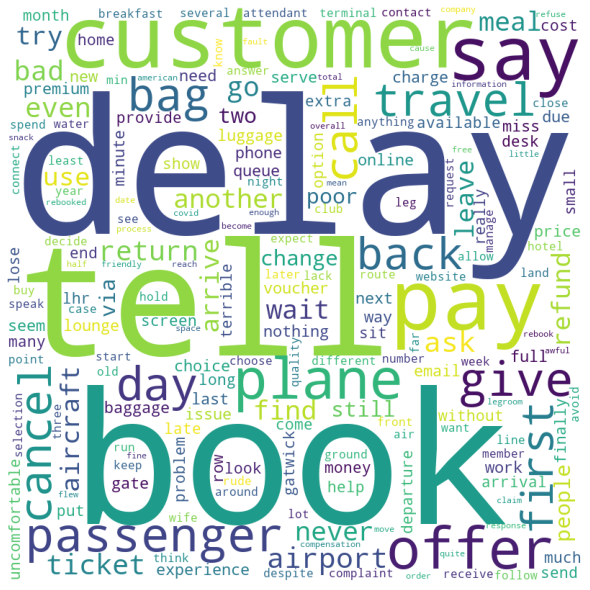

In [ ]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'neg',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
df.head(10)

,reviews,review_processed,scores,compound,sentiment
0,Not Verified | Worst experience ever. Outbound...,verified bad experience ever outbound cancel n...,"{'neg': 0.197, 'neu': 0.696, 'pos': 0.108, 'co...",-0.5253,neg
1,✅ Trip Verified | Check in was a shambles at ...,shamble bwi counter open full bag drop queue e...,"{'neg': 0.09, 'neu': 0.86, 'pos': 0.05, 'compo...",-0.6590,neg
2,✅ Trip Verified | Beyond disgusted with the fa...,beyond disgust fact baggage yet deliver week e...,"{'neg': 0.062, 'neu': 0.854, 'pos': 0.084, 'co...",0.4215,pos
3,✅ Trip Verified | On July 19th 2022 I had subm...,july 19th 2022 submit complaint form regard fa...,"{'neg': 0.069, 'neu': 0.896, 'pos': 0.035, 'co...",-0.4939,neg
4,✅ Trip Verified | I booked the flight on Oct ...,booked oct cancel day learn entry visa receive...,"{'neg': 0.082, 'neu': 0.818, 'pos': 0.1, 'comp...",0.3180,pos
5,✅ Trip Verified | London to Gibraltar on 25th...,gibraltar 25th october 2022 book several month...,"{'neg': 0.113, 'neu': 0.838, 'pos': 0.049, 'co...",-0.7579,neg
6,Not Verified | I’ve generally been a loyal Go...,generally loyal gold status flyer route recent...,"{'neg': 0.075, 'neu': 0.815, 'pos': 0.11, 'com...",0.8651,pos
7,✅ Trip Verified | A great flight. The suites ...,great suite aircraft really provide maximum co...,"{'neg': 0.054, 'neu': 0.749, 'pos': 0.196, 'co...",0.9405,pos
8,✅ Trip Verified | I am happy to say that this...,happy say quite except second rate euro everyt...,"{'neg': 0.068, 'neu': 0.661, 'pos': 0.271, 'co...",0.9266,pos
9,✅ Trip Verified | Just a few years ago flying...,verified year ago enjoyable change day five pl...,"{'neg': 0.08, 'neu': 0.766, 'pos': 0.154, 'com...",0.9815,pos


Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'pos' : 1, 'neg' : 0}).values
featureNames = tfidf.get_feature_names()


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, X_test.shape

((700, 2500), (300, 2500))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Building the ML Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
accuracy1 = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )
print("The model roc_auc_score is", accuracy1)

[[ 80  52]
 [ 45 123]]
The model accuracy is 0.6766666666666666
The model roc_auc_score is 0.6691017316017317


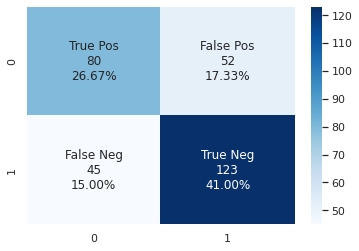

In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.6533639971139971

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
17,0.081451,comfortable
11,0.044126,best
27,0.042493,great
7,0.031065,attentive
22,0.028667,delay
...,...,...
13,0.004802,cancel
64,0.004767,thank
3,0.004322,landing
31,0.003842,plane
